## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### utilities functions to apply processes
import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# ETL

In [2]:
### Loading the eyetracker ddata preprocess and extract features from that data

In [3]:
final_df = pd.DataFrame()
filenames = glob.glob('EyeT/*.csv')
for file in tqdm(filenames):
    df_temp = raw_data = pd.read_csv(file)
    
    ### preprocess the data
    processed_data = utils.preprocess_data(df_temp)
    if 'EyeT_group_dataset_III_' in file :
        group = 'Test'
    elif 'EyeT_group_dataset_II_' in file:
        group = 'Control'
        
    #Extract features
    features = utils.feature_extraction(processed_data,group)
    final_df = pd.concat([final_df,features])    

100%|██████████| 502/502 [01:48<00:00,  4.65it/s]


In [4]:
final_df["Participant Name"] = final_df['Participant Name'].replace("Participant00",'',regex=True).astype(int)
final_df.rename(columns={"Participant Name": 'Participant nr'}, inplace=True)
final_df

,Participant nr,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std
0,6,Control,Recording12,5962,321.884770,3.867847,3.900,0.201668,1000.750000,968.0,297.738293,346.473064,333.0,252.314419,1001.180224,974.0,299.634348,346.975119,329.0,256.425484
0,12,Control,Recording4,1952,306.662910,3.519250,3.010,1.179666,955.727983,963.0,187.337376,576.041746,579.0,186.207604,977.362243,977.0,184.508887,583.546195,564.0,156.349276
0,55,Test,Recording1,3674,388.541916,2.996927,2.970,0.373071,912.911364,916.0,336.255489,407.089009,397.0,237.397506,916.946091,918.0,330.405105,420.048217,414.0,238.612495
0,29,Test,Recording4,13080,218.527982,2.538417,2.545,0.185478,918.260127,900.0,321.183370,380.450479,406.0,284.981719,924.715302,902.0,323.989629,367.867845,374.0,286.207643
0,46,Control,Recording2,5256,362.306317,2.847028,2.845,0.151164,913.055257,884.0,275.394374,435.369929,435.0,246.711680,921.524866,897.0,266.607976,431.723792,437.0,257.450667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,36,Control,Recording1,5683,281.991202,3.828529,3.815,0.186497,878.983202,936.0,279.100244,807.105590,876.0,260.386564,876.626239,936.0,281.156597,805.575028,876.0,259.593590
0,26,Control,Recording3,5450,343.847339,3.851622,3.850,0.186402,909.595344,924.0,238.036024,347.803529,318.0,272.690685,913.746947,928.0,238.023123,356.094175,326.0,274.941207
0,1,Test,Recording7,5996,248.771014,2.965306,2.965,0.115002,922.563108,942.0,285.772998,312.030707,341.0,304.662181,920.068886,932.0,300.195375,291.145393,308.0,311.602684
0,31,Test,Recording2,2636,267.589909,3.111674,3.075,0.170197,892.577267,895.0,258.787868,265.997446,280.0,203.463056,885.788525,896.0,226.534051,267.573732,280.0,200.438951


In [5]:
### loading the empathy score data
score_df = pd.read_csv('Questionnaire_datasetIB.csv', encoding='cp1252')
score_df

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the ‘other guy’s’ point of view.,"I am usually objective when I watch a film or play, and I don’t often get completely caught up in it.",I try to look at everybody’s side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other people’s sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds
5,6,9742794,07.10.2020 16:23,07.10.2020 16:23,Yes,Proceed,2,2,4,3,...,1,3,4,2,2,3,3,119,95,9 minutes 39 seconds
6,7,9957985,20.10.2020 14:57,20.10.2020 14:57,Yes,Proceed,1,2,2,3,...,2,2,3,2,4,3,3,97,73,5 minutes 49 seconds
7,8,9981681,21.10.2020 14:13,21.10.2020 14:13,Yes,Proceed,1,3,1,3,...,4,2,2,2,1,1,4,98,76,9 minutes 35 seconds
8,9,10176722,29.10.2020 14:01,29.10.2020 14:01,Yes,Proceed,2,2,2,4,...,1,3,2,1,2,3,2,99,78,7 minutes 45 seconds
9,10,10187952,29.10.2020 22:29,29.10.2020 22:29,Yes,Proceed,1,3,3,3,...,2,2,3,3,3,3,3,100,76,4 minutes 45 seconds


In [6]:
### mergind the dfs to get the class labels
final_df = pd.merge(final_df, score_df[['Participant nr','Total Score extended']], on='Participant nr', how='inner')
final_df

,Participant nr,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,...,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
0,6,Control,Recording12,5962,321.884770,3.867847,3.900,0.201668,1000.750000,968.0,...,346.473064,333.0,252.314419,1001.180224,974.0,299.634348,346.975119,329.0,256.425484,119
1,6,Control,Recording13,6067,322.309049,3.736822,3.745,0.184397,1081.985186,1082.0,...,445.591859,464.0,271.484371,1080.023164,1081.0,286.496977,448.668247,462.0,273.931696,119
2,6,Control,Recording13,6067,322.309049,3.736822,3.745,0.184397,1081.985186,1082.0,...,445.591859,464.0,271.484371,1080.023164,1081.0,286.496977,448.668247,462.0,273.931696,119
3,6,Control,Recording11,5807,297.007577,3.454385,3.460,0.149385,1176.890879,1199.0,...,295.348127,246.0,265.744163,1174.739699,1190.0,440.083271,298.724264,250.0,266.093429,119
4,6,Control,Recording12,5962,321.884770,3.867847,3.900,0.201668,1000.750000,968.0,...,346.473064,333.0,252.314419,1001.180224,974.0,299.634348,346.975119,329.0,256.425484,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,26,Control,Recording3,5450,343.847339,3.851622,3.850,0.186402,909.595344,924.0,...,347.803529,318.0,272.690685,913.746947,928.0,238.023123,356.094175,326.0,274.941207,111
498,30,Control,Recording2,6147,450.056776,5.245446,5.270,0.421417,787.138451,799.0,...,337.137474,304.0,261.614604,794.328697,808.0,274.882930,341.305899,301.0,258.148389,77
499,30,Control,Recording4,5896,366.636364,5.006974,5.030,0.450371,764.217083,774.5,...,346.613333,325.0,216.442570,771.683849,799.0,290.907374,365.526616,327.0,235.974626,77
500,30,Control,Recording1,5775,353.728658,5.676047,5.715,0.436385,904.636182,887.0,...,442.885148,360.0,356.282684,898.852054,885.0,364.854992,445.227177,356.0,357.189830,77


### Exploratory data Analysis

In [7]:
### check basic stats of data
final_df.describe()

,Participant nr,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,22.673307,5121.804781,320.871694,3.173988,3.158222,0.234660,923.285981,923.097610,279.284970,448.339797,453.477092,263.984316,924.914874,925.720120,268.667016,452.033705,456.316733,253.533741,117.043825
std,19.065620,3306.395421,148.527529,0.506284,0.504791,0.140840,79.442290,70.535395,57.166109,111.079774,129.147311,48.752133,83.141174,74.759113,67.888185,124.595834,141.850010,57.882347,18.529312
min,1.000000,86.000000,128.689189,1.663501,1.560000,0.091130,722.131808,521.000000,74.465079,126.130802,33.000000,75.999008,709.402528,519.000000,37.116274,92.052922,51.000000,50.883095,53.000000
25%,5.000000,2750.000000,226.378865,2.891573,2.880000,0.149947,864.999339,880.625000,246.333976,360.126144,351.000000,239.316822,871.058089,885.000000,234.694611,353.924966,346.250000,220.342216,108.000000
50%,18.000000,4235.000000,293.554707,3.061182,3.055000,0.199329,916.832980,919.000000,277.679647,458.373100,449.000000,265.869385,918.519809,917.000000,269.492978,460.838615,447.500000,258.349995,121.000000
75%,39.000000,6442.500000,377.788203,3.397512,3.330000,0.262802,968.486968,968.000000,311.732238,532.093230,548.750000,299.712629,964.012614,967.750000,313.929984,533.422764,558.000000,302.463961,128.000000
max,60.000000,16894.000000,1762.581701,5.676047,5.715000,1.179666,1263.553762,1255.000000,488.898311,807.105590,876.000000,431.907101,1302.523355,1345.000000,503.130855,882.295690,967.000000,365.617806,151.000000


In [8]:
### cheeck for missing values
final_df.isna().sum()

Participant nr             0
Project Name               0
Recording Name             0
Total Fixations            0
Avg. Fixation Duration     0
Pupil Diameter Mean        0
Pupil Diameter Median      0
Pupil Diameter Std         0
Gaze Point X Mean          0
Gaze Point X Median        0
Gaze Point X Std           0
Gaze Point Y Mean          0
Gaze Point Y Median        0
Gaze Point Y Std           0
Fixation Point X Mean      0
Fixation Point X Median    0
Fixation Point X Std       0
Fixation Point Y Mean      0
Fixation Point Y Median    0
Fixation Point Y Std       0
Total Score extended       0
dtype: int64

There is no missing values in the dataframe

Test       360
Control    142
Name: Project Name, dtype: int64

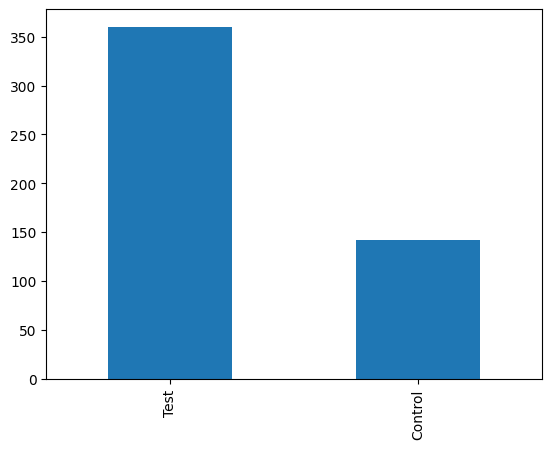

In [9]:
final_df['Project Name'].value_counts().plot.bar()
final_df['Project Name'].value_counts()

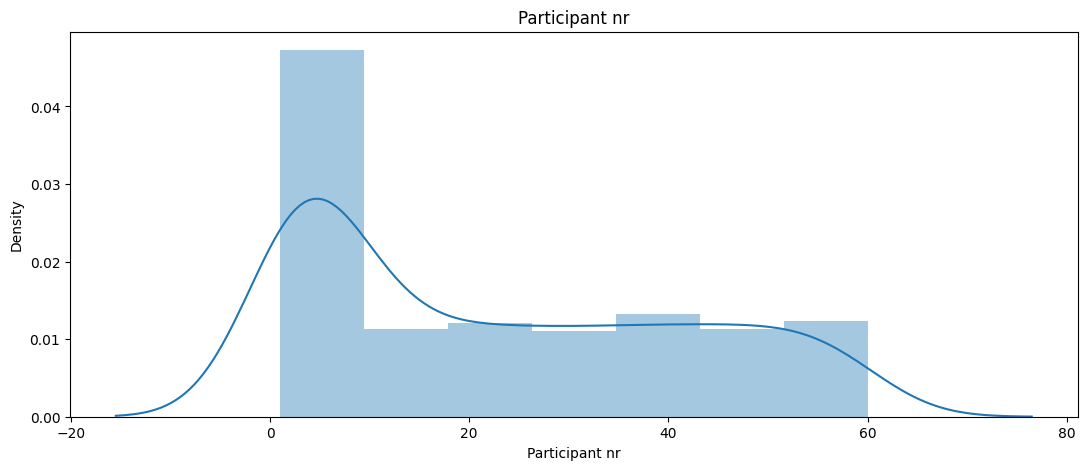

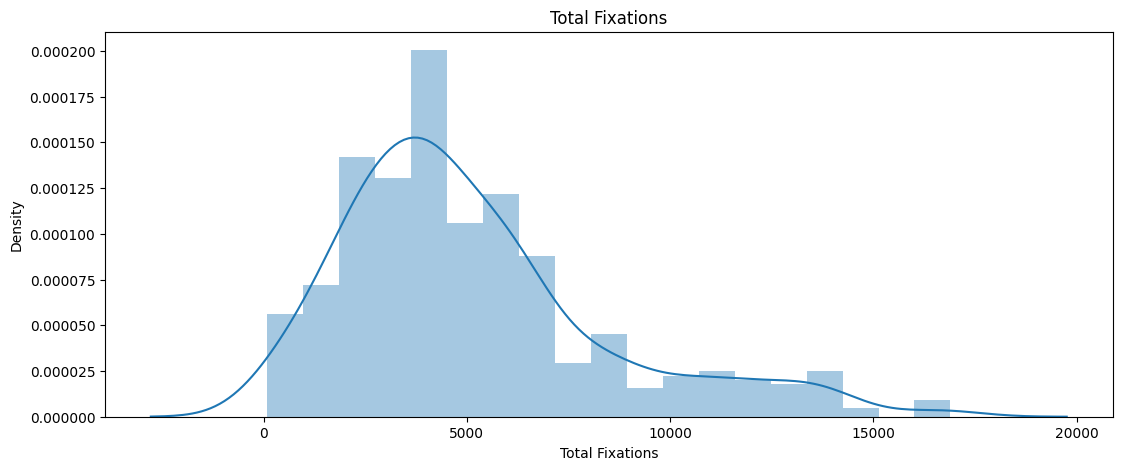

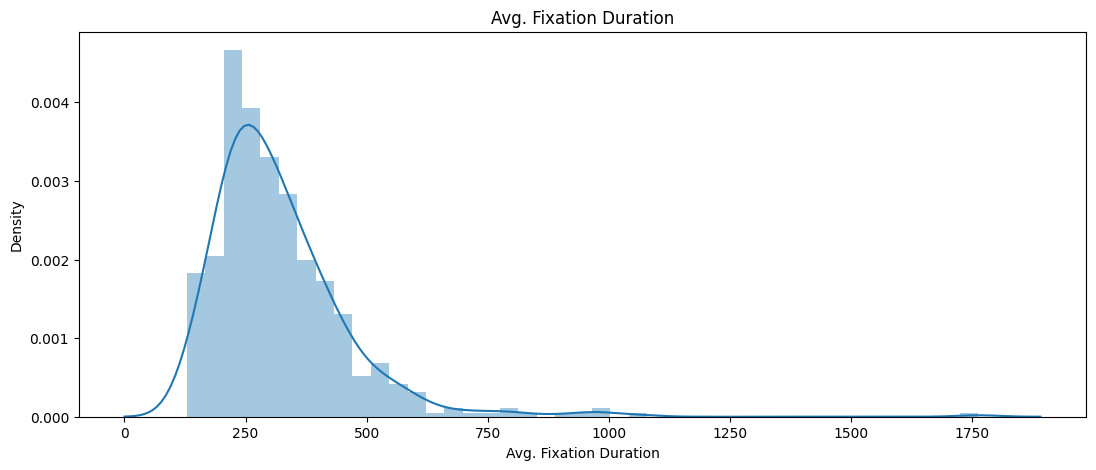

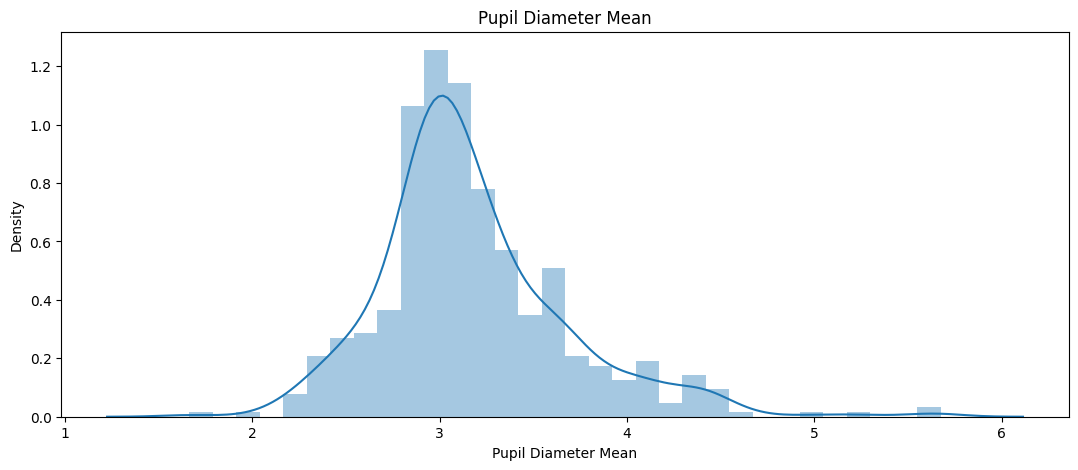

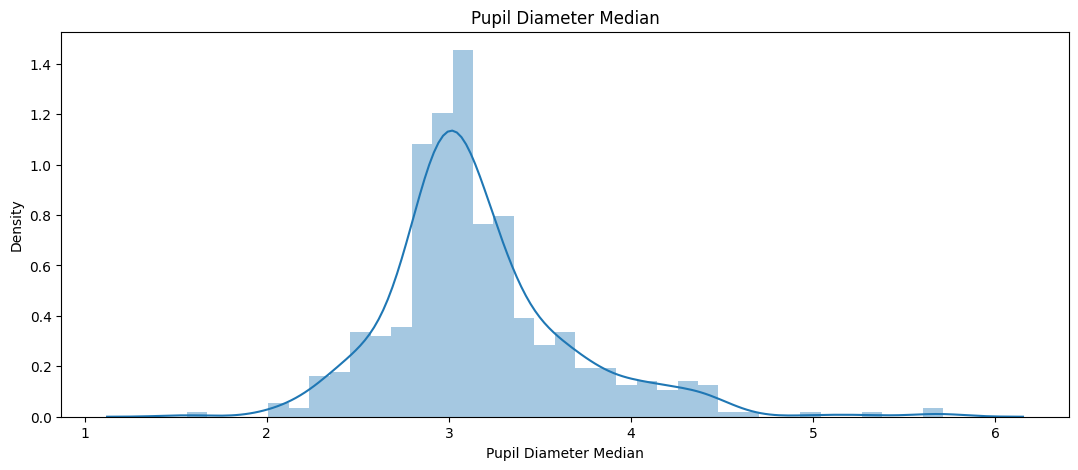

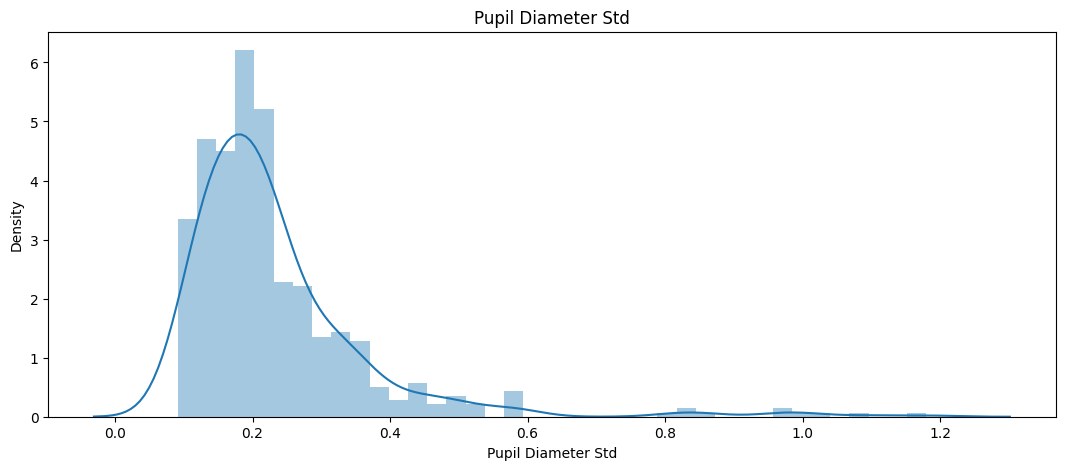

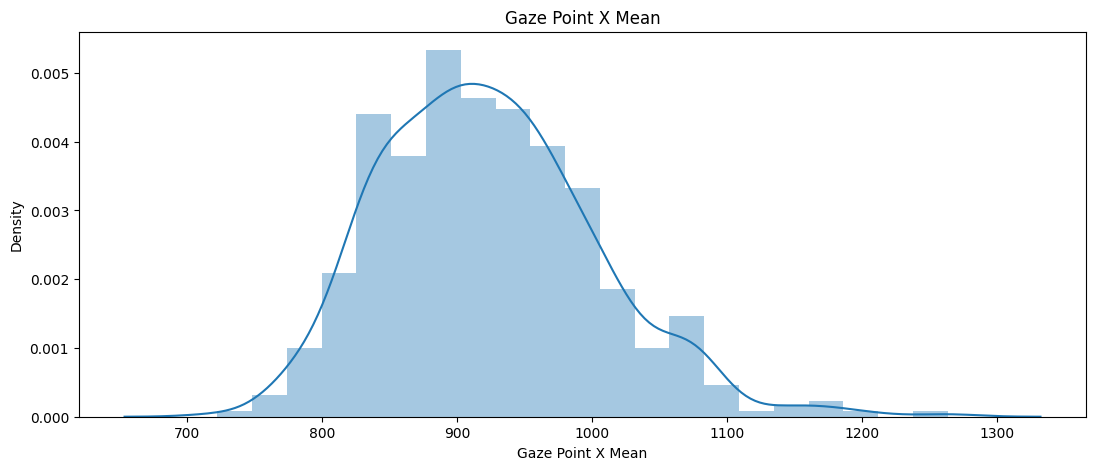

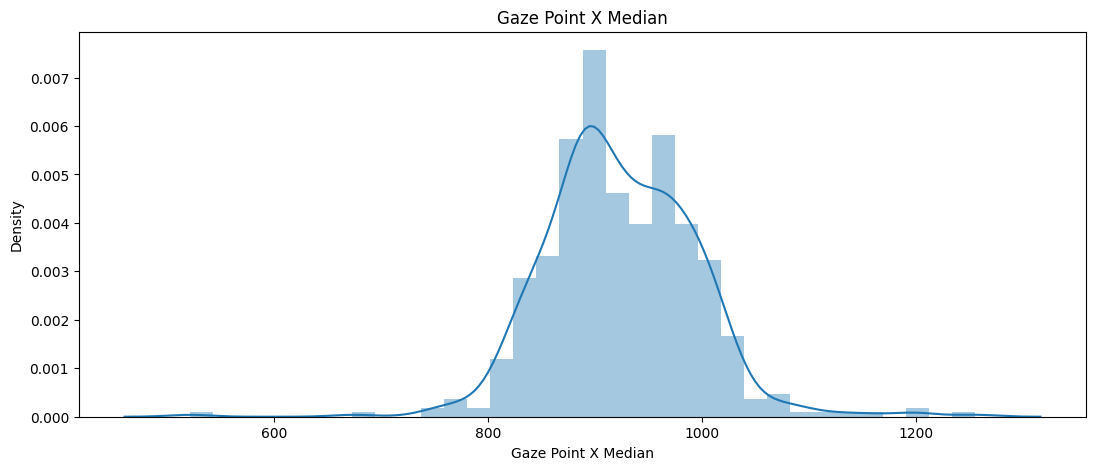

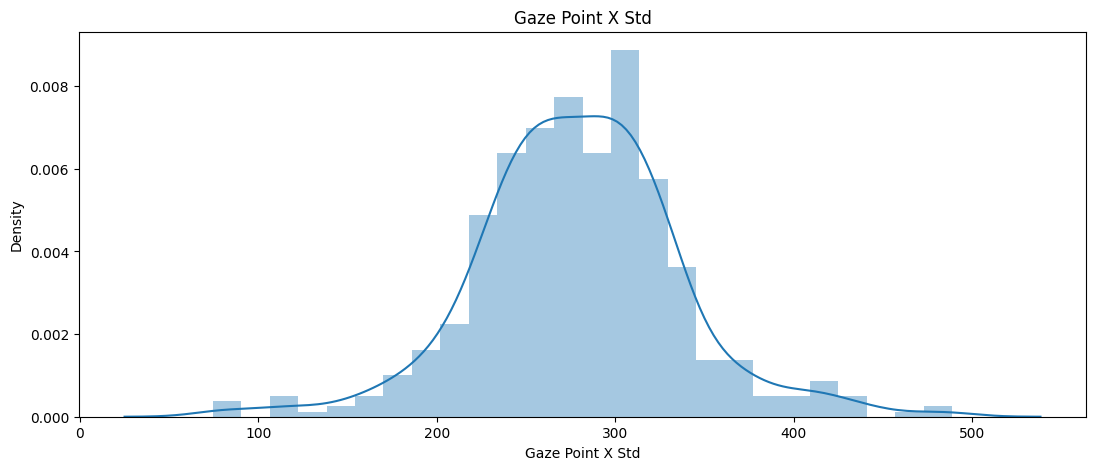

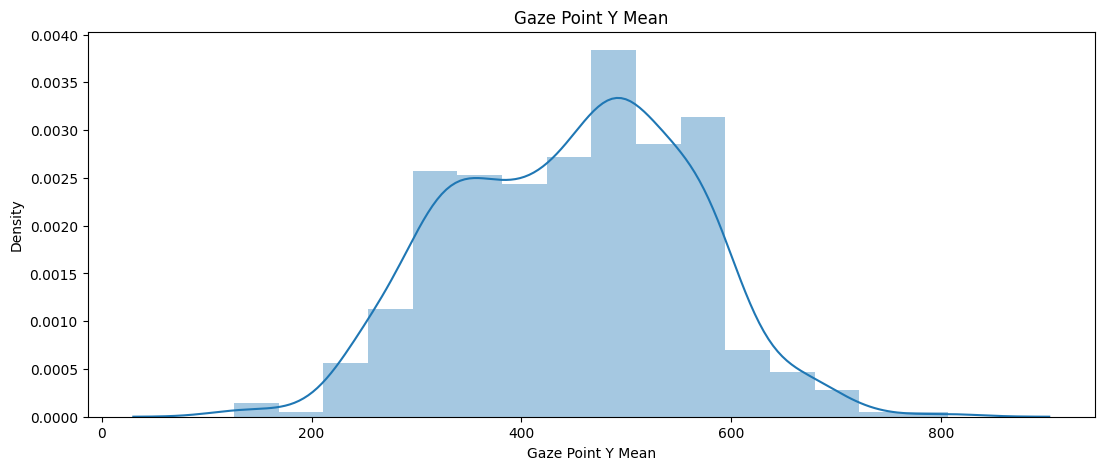

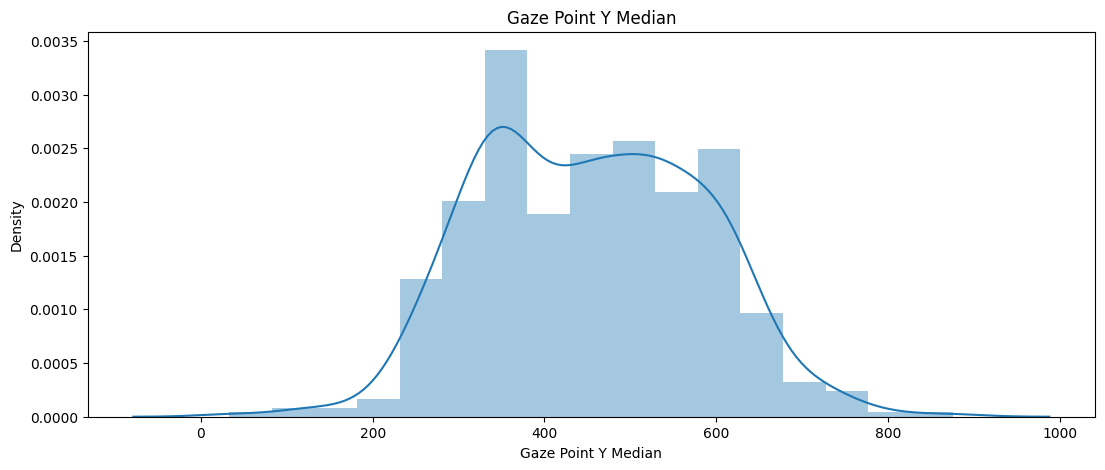

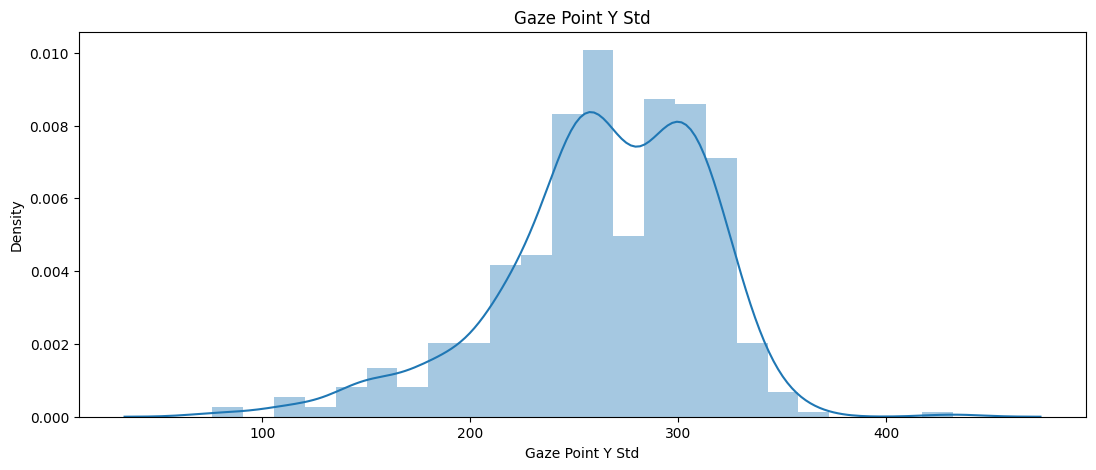

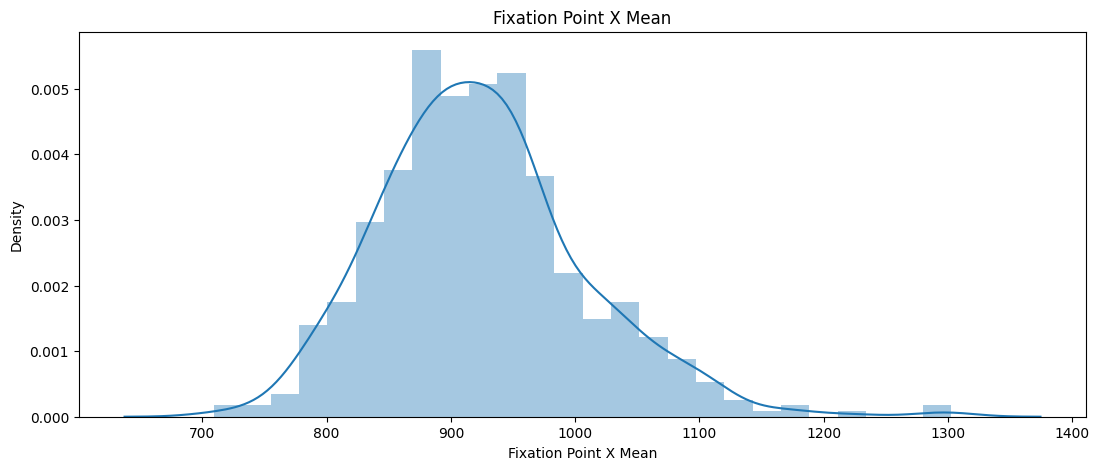

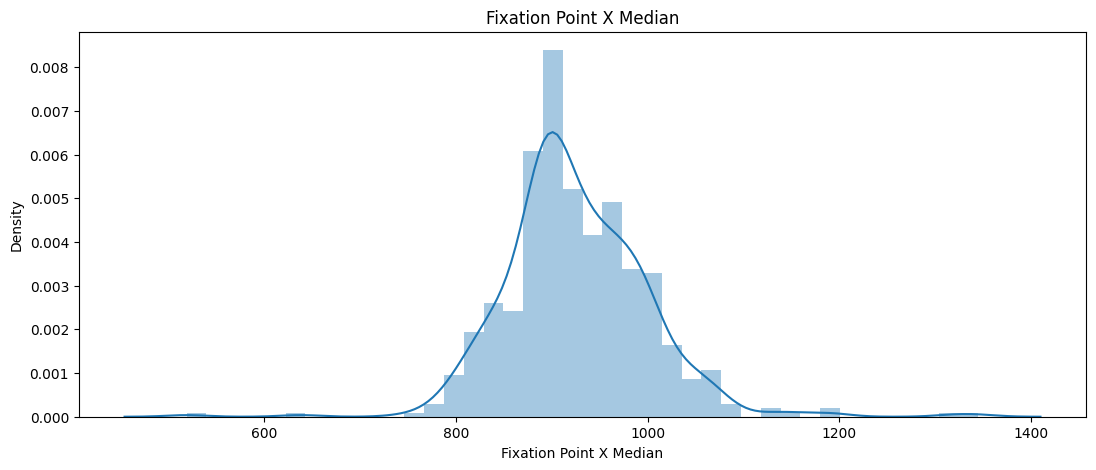

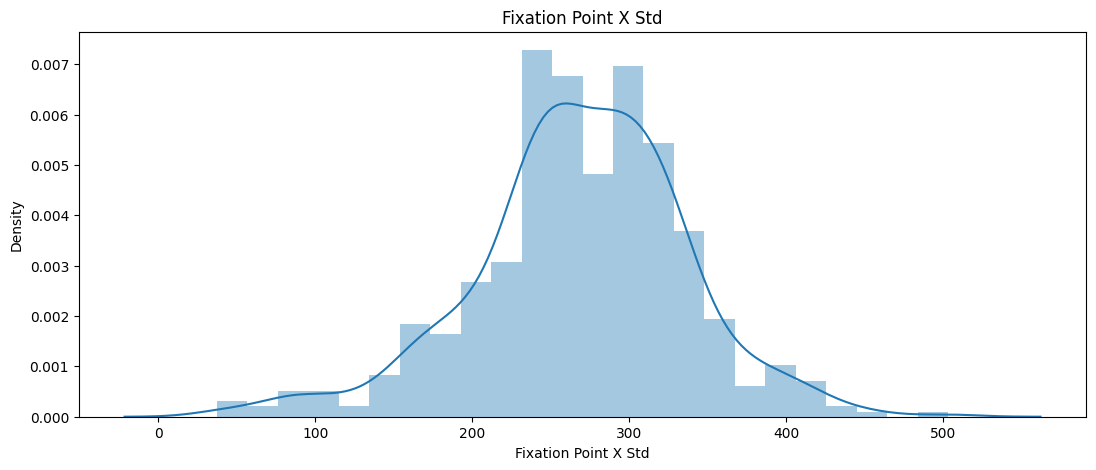

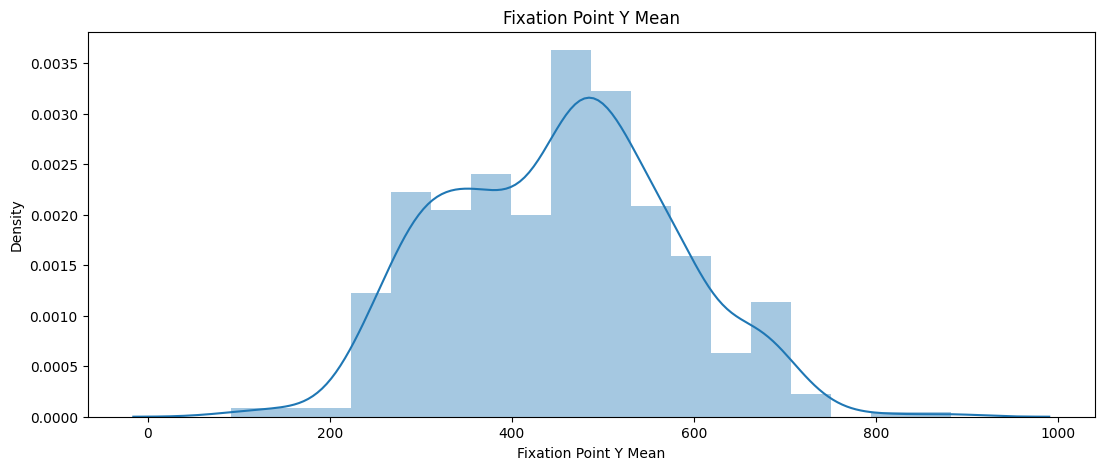

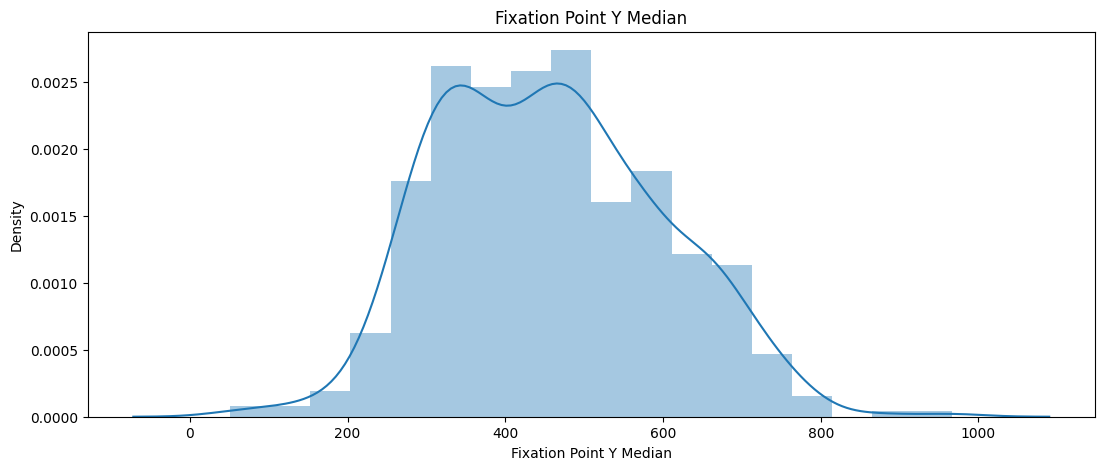

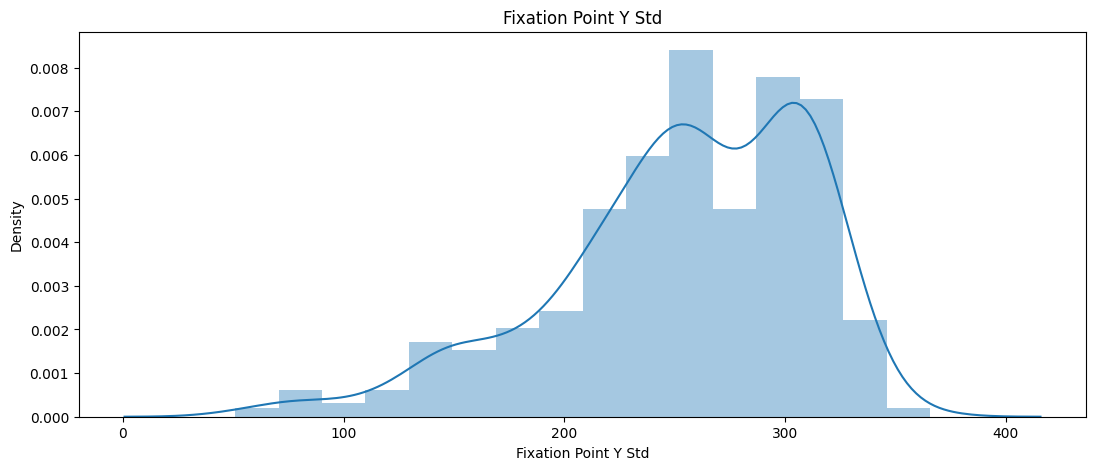

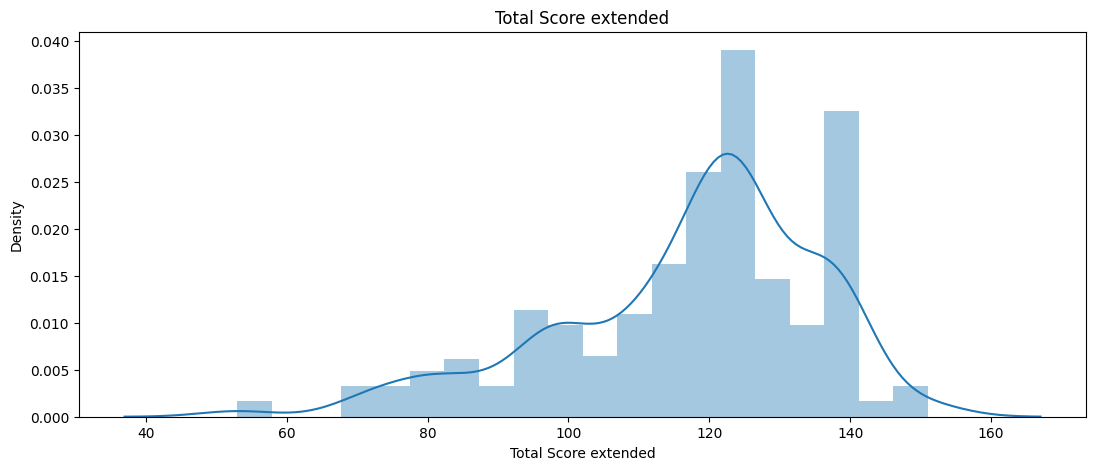

In [38]:
numeric_columns = final_df.select_dtypes(include=['number'])
for i in numeric_columns.columns:
    plt.figure(figsize=(13,5))
    plt.title(i)
    sns.distplot(final_df[i])
    plt.plot()

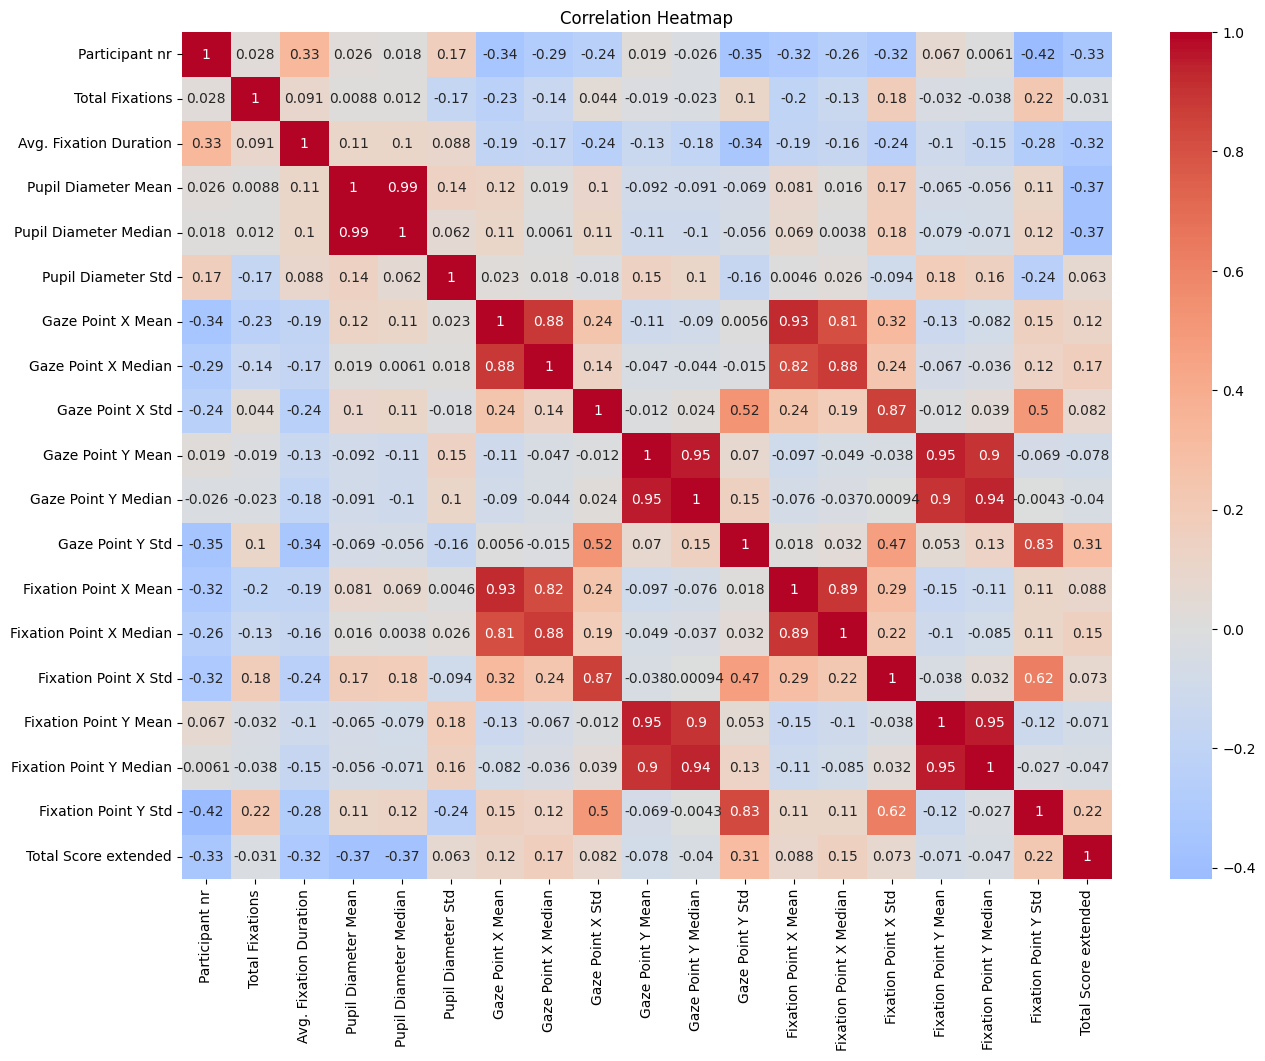

In [43]:
#check the feature cooreleation
# Calculate correlation matrix
correlation_matrix = final_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Regression Models:

In [10]:
df = final_df.copy()
df = final_df.drop(["Participant nr","Project Name","Recording Name"],axis=1 )

In [11]:
### seperate the train and test data by their groups
X_train = df[final_df["Project Name"]=="Test"].drop("Total Score extended",axis=1)
X_test= df[final_df["Project Name"]=="Control"].drop("Total Score extended",axis=1)
y_train = df[final_df["Project Name"]=="Test"]["Total Score extended"]
y_test= df[final_df["Project Name"]=="Control"]["Total Score extended"]

In [22]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100)
}

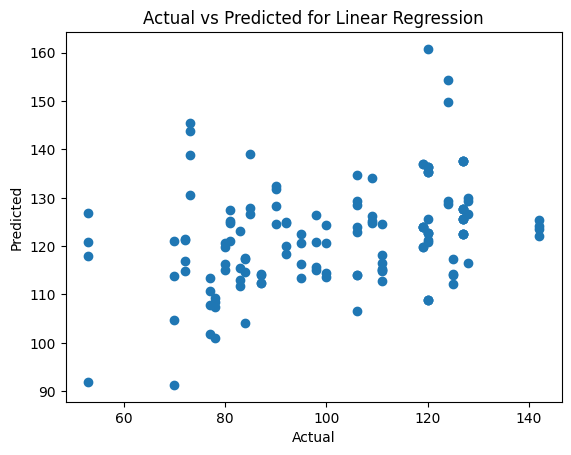

Model: Linear Regression
MSE = 808.81, RMSE = 28.44



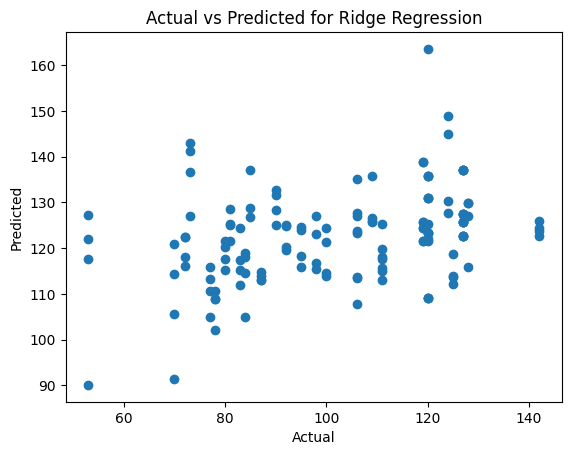

Model: Ridge Regression
MSE = 819.19, RMSE = 28.62



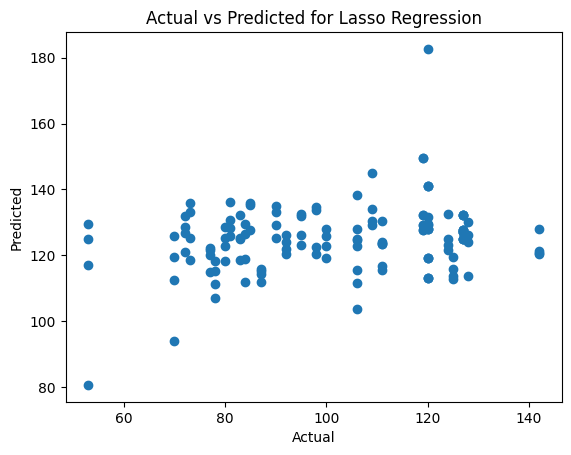

Model: Lasso Regression
MSE = 982.13, RMSE = 31.34



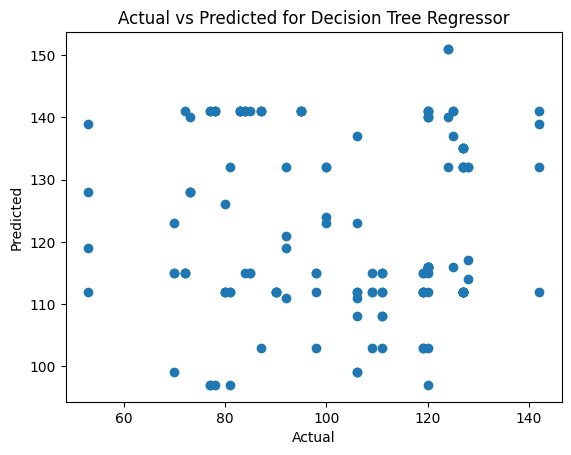

Model: Decision Tree Regressor
MSE = 1067.57, RMSE = 32.67



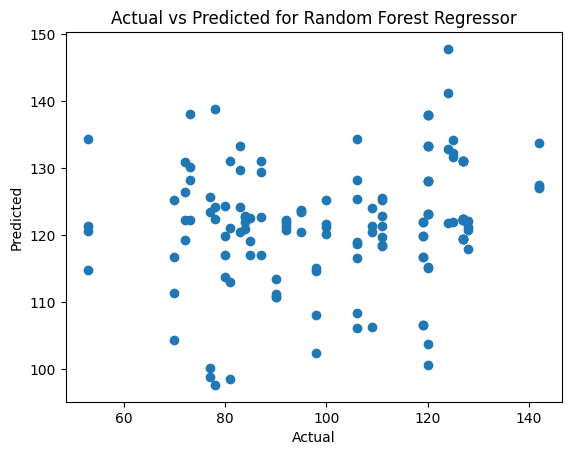

Model: Random Forest Regressor
MSE = 848.88, RMSE = 29.14



In [23]:
# Create a DataFrame to store results
results_df = pd.DataFrame({'Actual': y_test})

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Add predicted values to results DataFrame
    results_df[f'Predicted_{model_name}'] = y_pred

    # Plot actual vs predicted
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

    print(f"Model: {model_name}")
    print(f"MSE = {mse:.2f}, RMSE = {rmse:.2f}")
    print()

In [32]:
results_df

,Actual,Predicted_Linear Regression,Predicted_Ridge Regression,Predicted_Lasso Regression,Predicted_Decision Tree Regressor,Predicted_Random Forest Regressor
0,119,119.755072,121.630405,127.611056,115.0,116.83
1,119,124.047640,125.704516,132.151434,103.0,106.65
2,119,124.047640,125.704516,132.151434,103.0,106.65
3,119,137.050977,138.777633,149.561896,112.0,122.03
4,119,119.755072,121.630405,127.611056,115.0,116.83
...,...,...,...,...,...,...
497,111,124.566238,125.228705,130.286533,103.0,118.43
498,77,110.738116,113.285604,121.558087,141.0,123.56
499,77,113.454220,115.978289,122.161905,141.0,125.70
500,77,107.880433,110.716336,120.032396,97.0,98.87


In [41]:
results

{'Linear Regression': {'MSE': 808.811421167064, 'RMSE': 28.43961007410376},
 'Ridge Regression': {'MSE': 819.188152044505, 'RMSE': 28.621463135984243},
 'Lasso Regression': {'MSE': 982.1253103808324, 'RMSE': 31.338878575673895},
 'Decision Tree Regressor': {'MSE': 985.9788732394367,
  'RMSE': 31.400300527852224},
 'Random Forest Regressor': {'MSE': 856.3252767605634,
  'RMSE': 29.263036014066678}}